<a href="https://colab.research.google.com/github/usamausman-dev/Face-Detection-using-Google-Colab/blob/master/Face_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Downloading Known Images From Web

In [ ]:
!mkdir known
!wget https://upload.wikimedia.org/wikipedia/commons/e/ed/Elon_Musk_Royal_Society.jpg -O known/elon.jpg
!wget https://upload.wikimedia.org/wikipedia/commons/a/a8/Bill_Gates_2017_%28cropped%29.jpg -O known/bill.jpg
!wget https://upload.wikimedia.org/wikipedia/commons/1/18/Mark_Zuckerberg_F8_2019_Keynote_%2832830578717%29_%28cropped%29.jpg -O known/mark.jpg

## Downloading Unknown Images From Web

In [ ]:
!mkdir unknown
!wget https://cdn.britannica.com/54/188754-050-A3613741/Elon-Musk-2010.jpg -O unknown/1.jpg
!wget https://ichef.bbci.co.uk/news/976/cpsprodpb/125B3/production/_107178157_178151.jpg -O unknown/2.jpg
!wget https://pbs.twimg.com/profile_images/1414439092373254147/JdS8yLGI_400x400.jpg -O unknown/3.jpg

## Installing & Importing Packages

In [ ]:
!pip install face_recognition

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 100.1 MB 26 kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566186 sha256=6eb5c015f60dfe10614ca06b4e3adda5864efded1fc42a9ca9fc55e836d582a2
  Stored in directory: /root/.cache/pip/wheels/d6/81/3c/884bcd5e1c120ff548d57c2ecc9ebf3281c9a6f7c0e7e7947a
Successfully built face-recognition-models


In [ ]:
import face_recognition   ##Detecting and recogniting faces
import cv2     ## intracting with images
import os       ## For Reading the file name
from google.colab.patches import cv2_imshow ## we are importing cv2_imshow from google.colab.patches because google colab doesn't support cv2.imshow() funciton.

In [ ]:
def read_img(path):
   img = cv2.imread(path) ## reading image
   (h,w) = img.shape[:2]  ## fetching height and width
   width = 500            ## hard coding width
   ratio = width / float(w) ## preparing a ration for height
   height = int(h * ratio)  ## generating new height
   return cv2.resize(img,(width,height)) ##return the reshaped image

In [ ]:
known_encodings = [] 
known_names = []
known_dir = 'known' ##Known directory path
for file in os.listdir(known_dir):
  img = read_img(known_dir + '/' + file) ##Reading all the images
  img_enc = face_recognition.face_encodings(img)[0] ##face encodings
  known_encodings.append(img_enc) 
  known_names.append(file.split('.')[0])
print(known_names) ## Printing all the known labels

['elon', 'mark', 'bill']


Processing 1.jpg
[0.3795323  0.88348702 0.70137004]


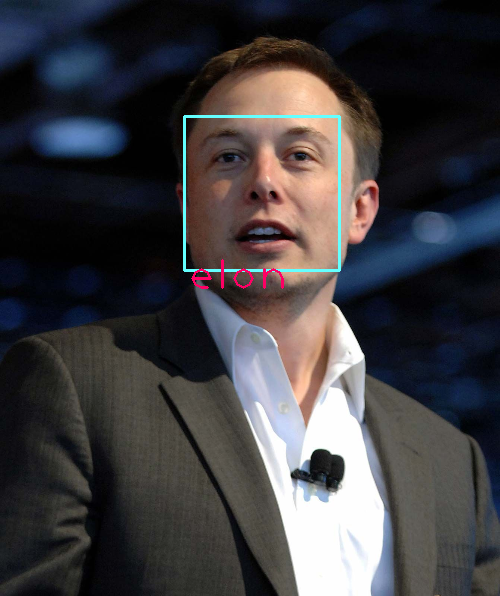

Processing 3.jpg
[0.75516201 0.81233432 0.45211408]


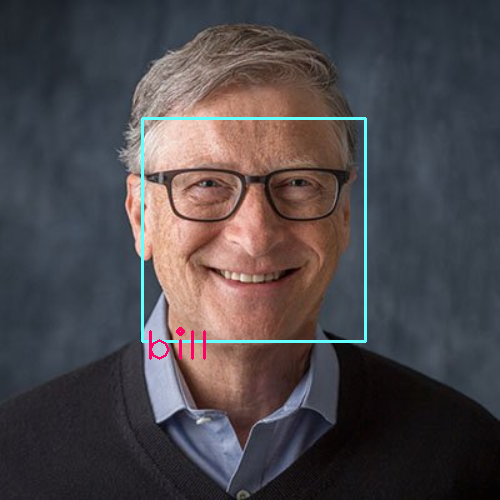

Processing 2.jpg
[0.91631979 0.36166782 0.74386315]


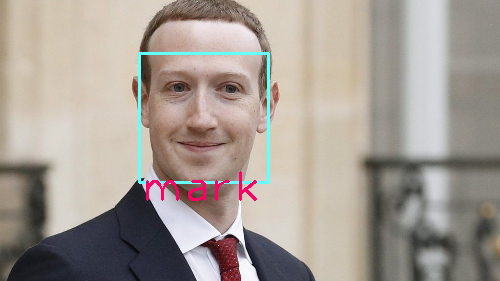

In [ ]:
unknown_dir = 'unknown' ##UNknown Images Directory
for file in os.listdir(unknown_dir):
 print("Processing",file)
 img = read_img(unknown_dir + '/' + file)##reading images
 img_enc = face_recognition.face_encodings(img)[0]##Encodings
 results = face_recognition.compare_faces(known_encodings,img_enc)
 ##Comparing Known Encodings with Unknown encoding
 print(face_recognition.face_distance(known_encodings,img_enc))
 ## Printing Face Distances
 res = [i for i, val in enumerate(results) if val]
 name = known_names[res[0]]
 
 '''
Drawing a rectangle box around the faces of unknown images using  face_locations function in library
'''
 (top,right,bottom,left) = face_recognition.face_locations(img)[0]
 cv2.rectangle(img,(left,top),(right,bottom),(255,255,100),2)
 ##Drawing Rectangle
 cv2.putText(img,name,(left+2,bottom+20),cv2.FONT_HERSHEY_PLAIN,3, (100,0,255),2) ##Putting labels(names) on the rectangle
 cv2_imshow(img) ##showing images